# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
!pip install --user --upgrade tables
!pip install --user pycaret

In [2]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [6]:
csv_file_path = '//content/drive/MyDrive/MS thesis/HFCAI/MIMAROPA/mimaropa_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
4070,2791193,Binduyan,City of Puerto Princesa,Palawan,0.585361,0.427302,0.786181,1.0,0,1,1,2791193,8.168878e-02,77.624744,32.259592,608.396824,280.759684,138.615632,113.412880,0.640707
1395,2653075,Amas,Brooke'S Point,Palawan,0.716115,0.728775,0.857399,1.0,0,1,1,2653075,1.763870e-13,132.290381,41.483665,877.328983,418.609941,203.412054,157.268555,0.629325
13213,3148972,Mabini,San Fernando,Romblon,0.282019,1.612117,0.618284,1.0,0,1,1,3148972,5.638798e-02,106.303028,79.900964,927.545918,445.360994,206.352926,194.541464,0.627694
13229,3151736,Mabini,San Fernando,Romblon,0.282019,1.612117,0.618284,1.0,0,1,1,3151736,5.332549e-03,195.547145,142.110121,1757.253815,846.241176,398.551094,375.733862,0.627694
13393,3169708,Otod,San Fernando,Romblon,0.359864,1.572273,0.619866,1.0,0,1,1,3169708,1.600310e-01,193.258784,99.194784,1597.377856,792.703040,367.704736,311.266336,0.627504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13088,3114346,Maniwaya,Santa Cruz,Marinduque,1.704563,2.241198,0.897543,0.0,0,0,0,3114346,4.397875e-02,21.595008,20.349120,208.751584,93.301440,37.652800,28.793312,0.354141
13023,3111581,Maniwaya,Santa Cruz,Marinduque,1.704563,2.241198,0.897543,0.0,0,0,0,3111581,1.856163e-02,2.024532,1.907730,19.570461,8.747010,3.529950,2.699373,0.354141
12699,3103292,Lapu-lapu Pob. (5th Zone),Santa Cruz,Marinduque,1.662442,2.249281,0.908025,0.0,0,0,0,3103292,0.000000e+00,37.023932,37.466277,346.712376,174.388414,75.193202,57.927091,0.353981
13025,3111585,Alobo,Santa Cruz,Marinduque,1.730164,2.196945,0.928646,0.0,0,0,0,3111585,1.200910e-01,1.028055,1.151071,10.104818,4.964541,2.100045,1.783720,0.353319


In [7]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

In [8]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2283925
1,2285307
2,2561919
3,2561920
4,2561921
...,...
13415,3173847
13416,3173848
13417,3173849
13418,3173850


In [9]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(13420, 1)"
2,Transformed data shape,"(13420, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


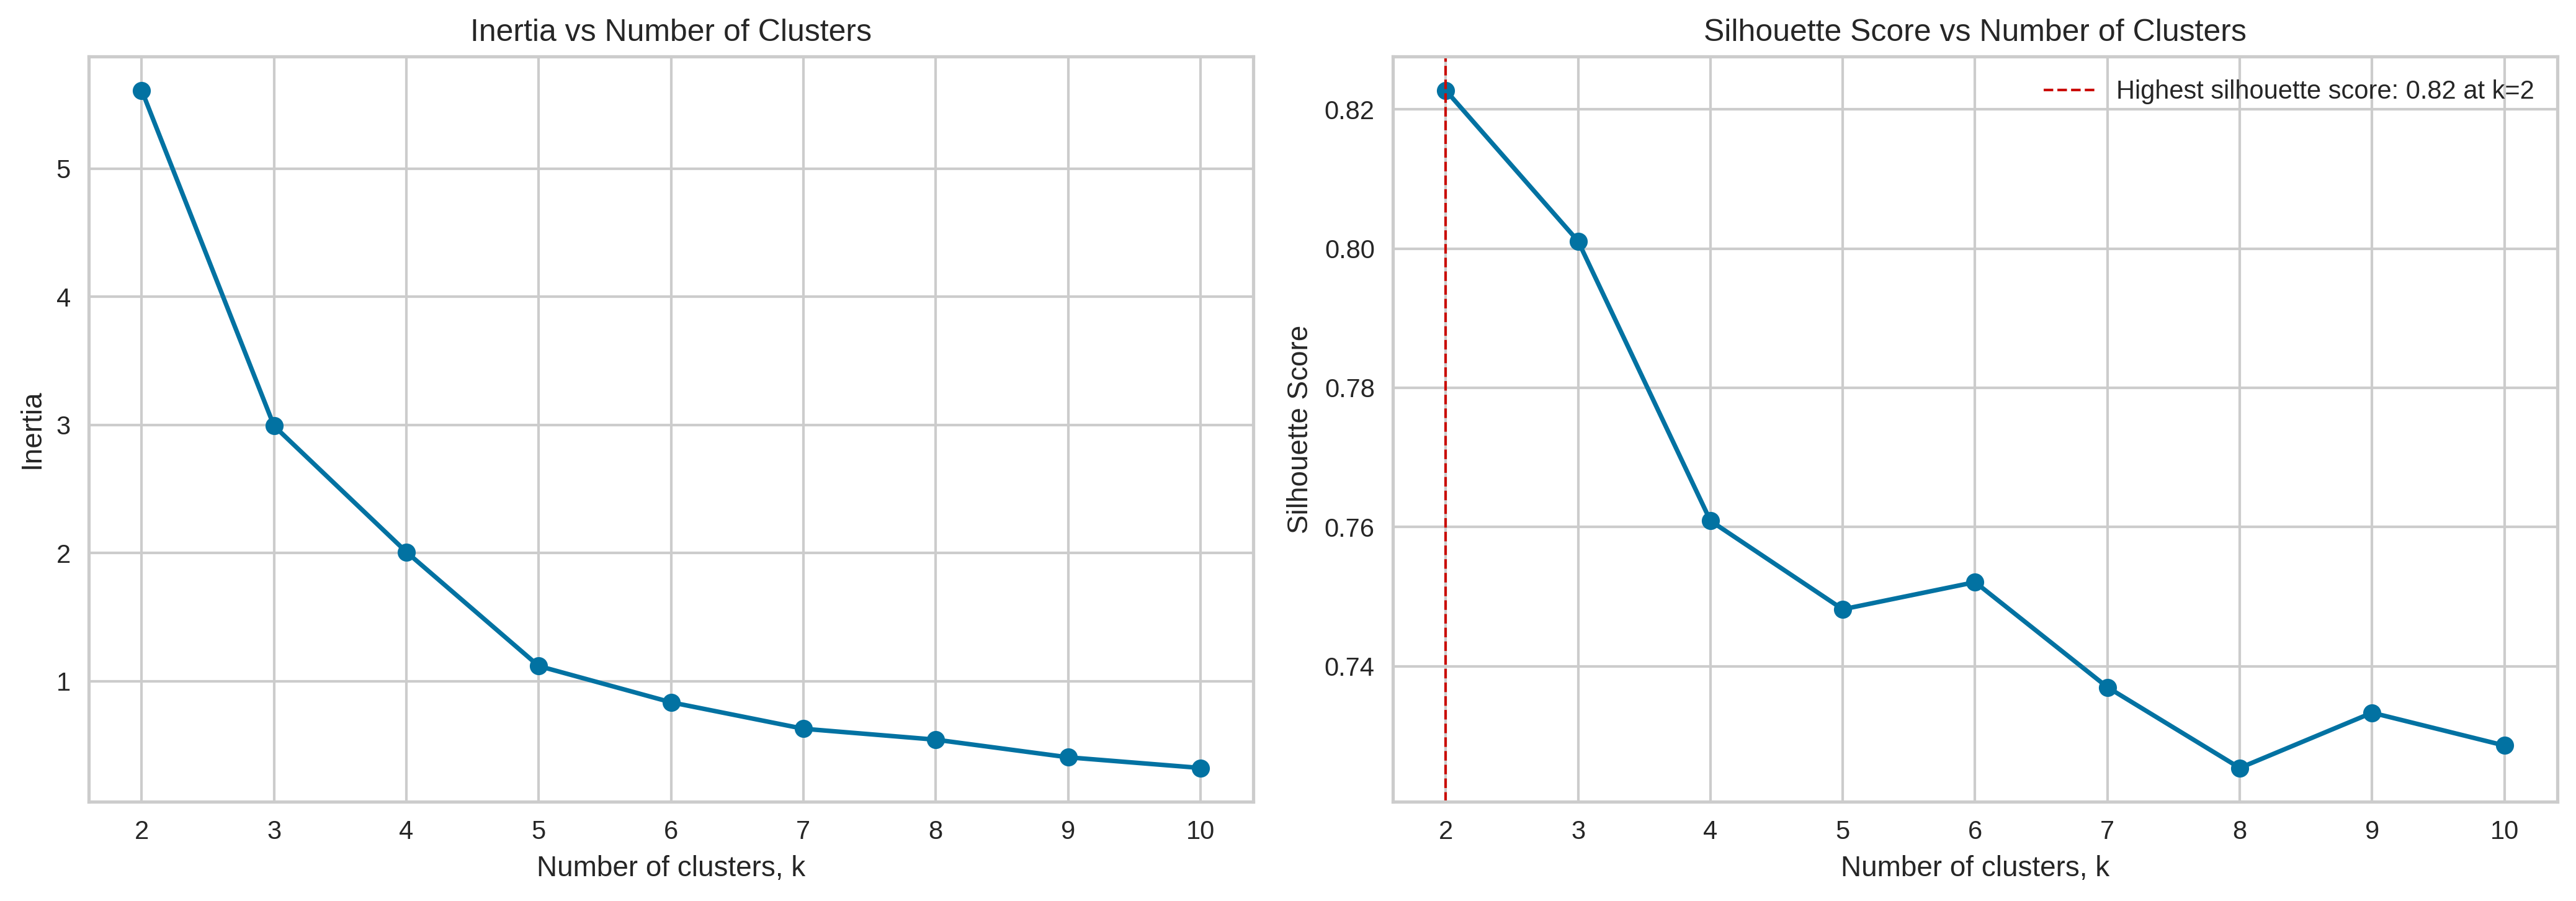

In [10]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7655,81736.6091,0.4596,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

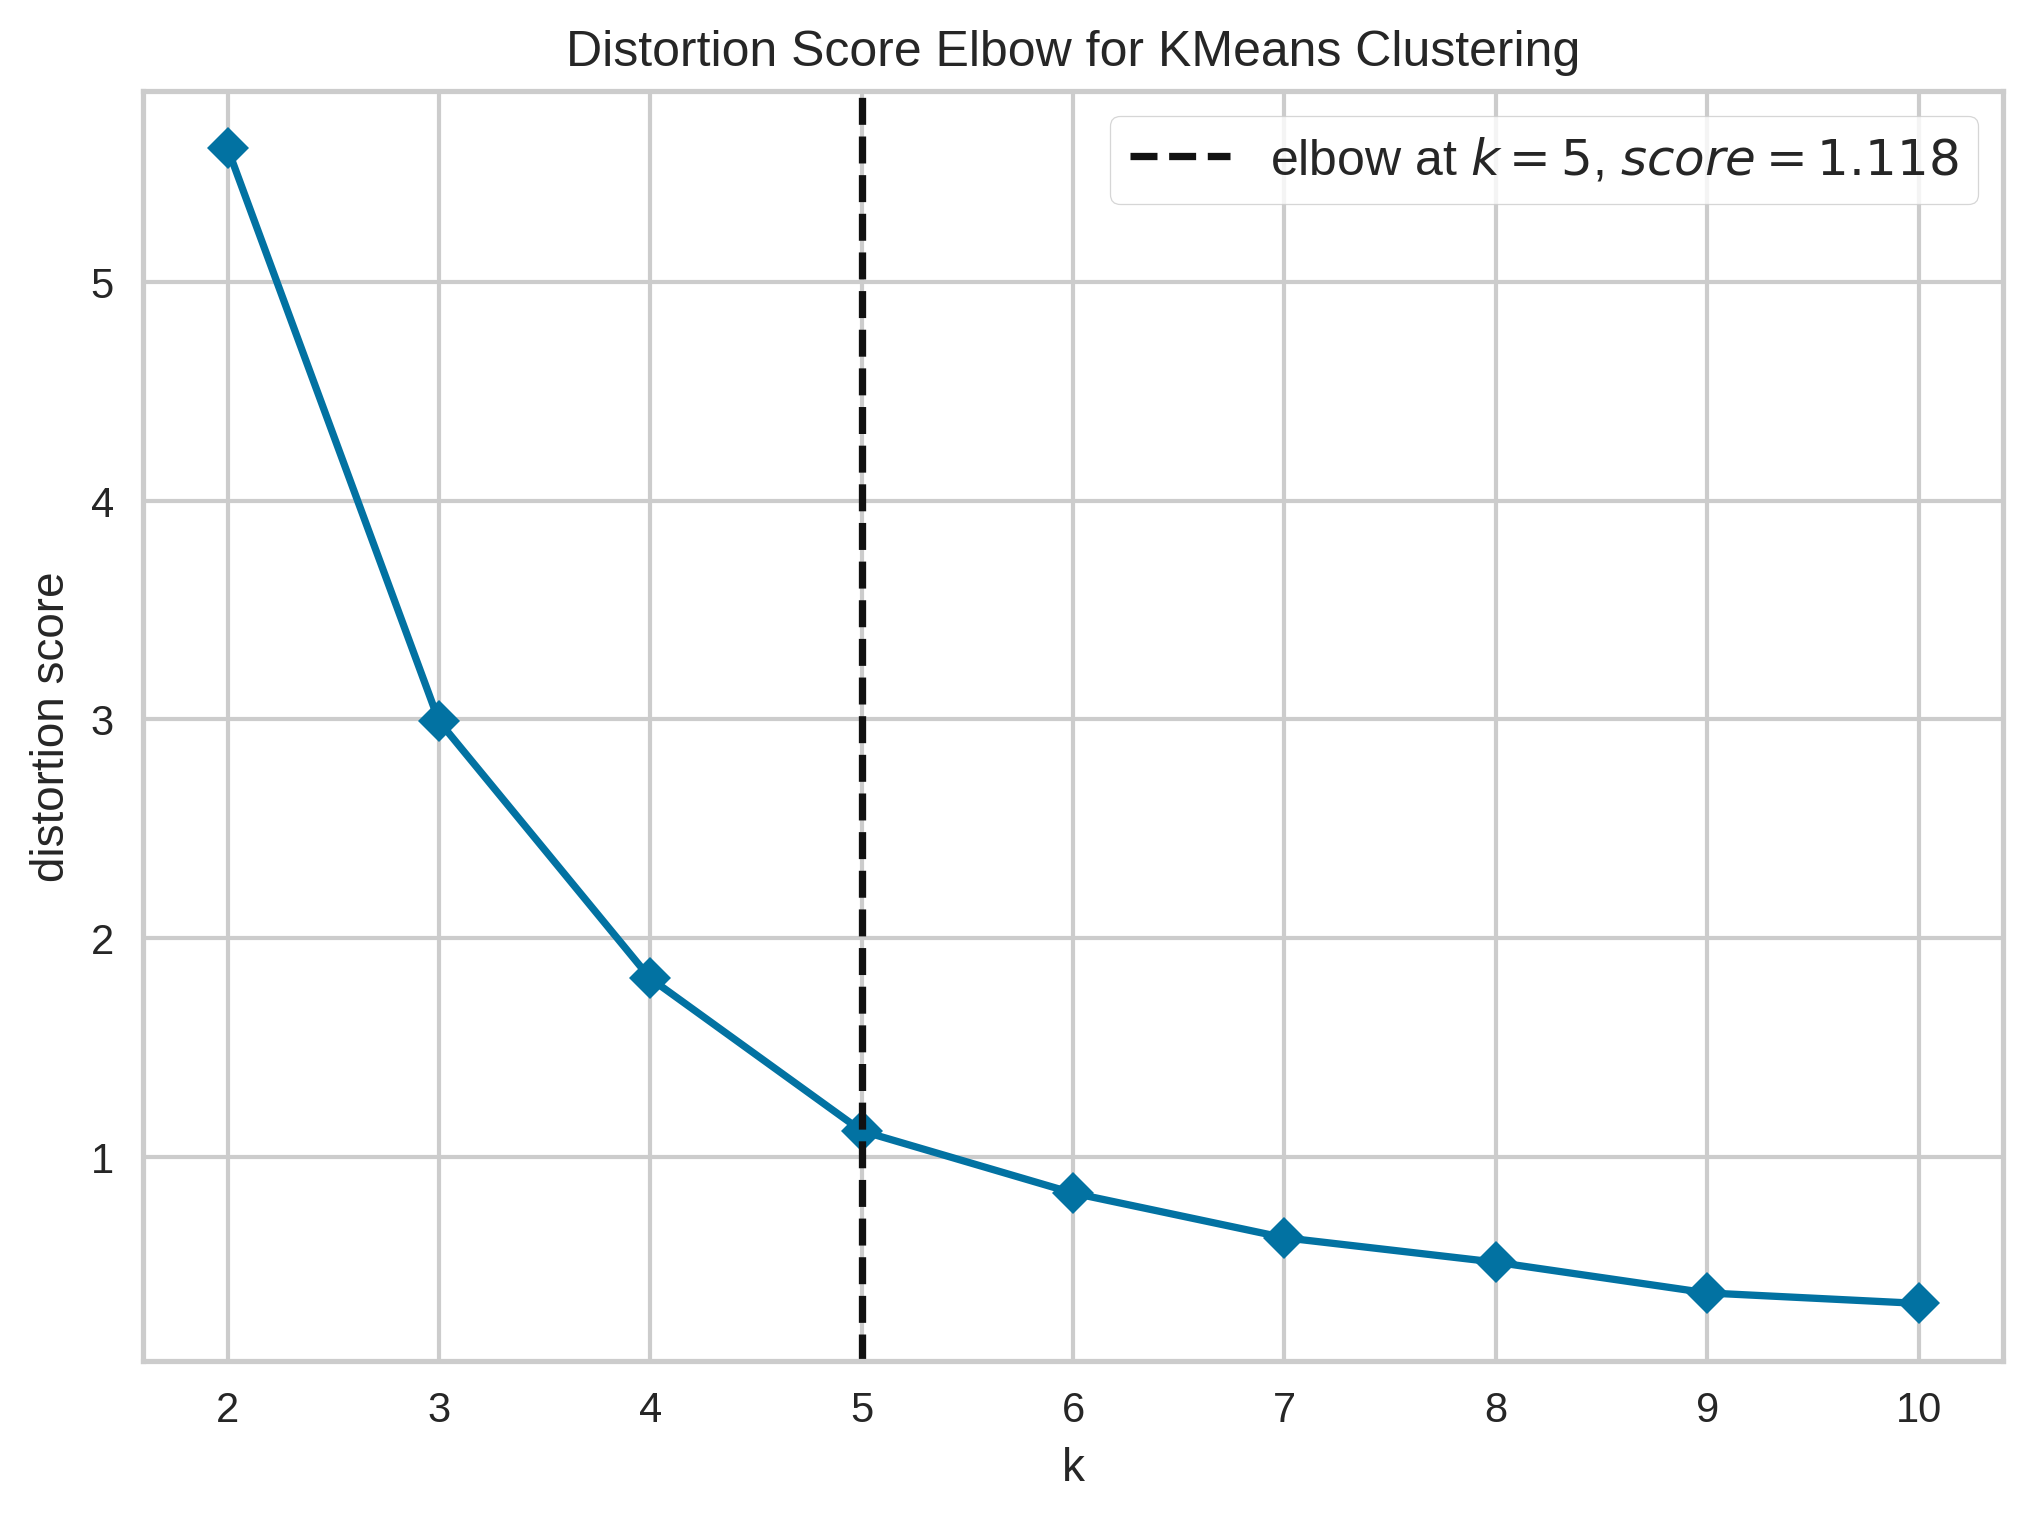

In [12]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [13]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [15]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, '/content/drive/MyDrive/MS thesis/preliminary site selection/MIMAROPA/mimaropa-HCFAI-Clusters-silhouette.pt')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8227,70290.9231,0.2609,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 0
1,0.500000,Cluster 0
2,0.500000,Cluster 0
3,0.399683,Cluster 1
4,0.500000,Cluster 0
5,0.500000,Cluster 0
6,0.500000,Cluster 0
7,0.500000,Cluster 0
8,0.500000,Cluster 0
9,0.500000,Cluster 0


In [16]:
model = create_model('kmeans', num_clusters = 5)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, '/content/drive/MyDrive/MS thesis/preliminary site selection/MIMAROPA/mimaropa-HCFAI-Clusters.pt')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7482,101618.3382,0.4171,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 0
1,0.500000,Cluster 0
2,0.500000,Cluster 0
3,0.399683,Cluster 1
4,0.500000,Cluster 0
5,0.500000,Cluster 0
6,0.500000,Cluster 0
7,0.500000,Cluster 0
8,0.500000,Cluster 0
9,0.500000,Cluster 0


# Fixing df for BPNN to find candidate locations

In [ ]:
# Find rows with at least one NaN
# nan_rows_any = df[df.isna().any(axis=1)]  # Using isna()
# nan_rows_any

# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [ ]:
HCFAIdf_results

,HCFAI,Accessibility Level
0,0.500000,Cluster 0
1,0.500000,Cluster 0
2,0.500000,Cluster 0
3,0.399683,Cluster 1
4,0.500000,Cluster 0
...,...,...
13415,0.504513,Cluster 0
13416,0.431753,Cluster 1
13417,0.452292,Cluster 4
13418,0.427762,Cluster 1


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)
lists = {}
for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):  # Assuming you have 3 clusters
    cluster_name = f"Cluster {cluster_number}"
    cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
    lists[cluster_name] = cluster_list

for cluster_name, cluster_list in lists.items():
  print(f"Cluster {cluster_name}: {cluster_list}")
  print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

Cluster Cluster 0: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.512816846370697, 0.524711012840271, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.521841824054718, 0.5, 0.5, 0.5, 0.5, 0.524711012840271, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.512816846370697, 0.512816846370697, 0.5, 0.5, 0.521841824054718, 0.5, 0.5, 0.5, 0.5258254408836365, 0.5, 0.5, 0.5, 0.5, 0.

In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
4070,0.640707,Cluster 2
1395,0.629325,Cluster 2
13213,0.627694,Cluster 2
13229,0.627694,Cluster 2
13393,0.627504,Cluster 2
...,...,...
13088,0.354141,Cluster 3
13023,0.354141,Cluster 3
12699,0.353981,Cluster 3
13025,0.353319,Cluster 3


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))
x = x.replace(['Cluster 3'],int(0))
x = x.replace(['Cluster 4'],int(0))

In [ ]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.500000,0,2283925
1,0.500000,0,2285307
2,0.500000,0,2561919
3,0.399683,0,2561920
4,0.500000,0,2561921
...,...,...,...
13415,0.504513,0,3173847
13416,0.431753,0,3173848
13417,0.452292,0,3173849
13418,0.427762,0,3173850


In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
df = df.drop(['HCFAI_x'], axis=1)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_y,Accessibility Level
0,2283925,Pag-Asa (Pob.),Kalayaan,Palawan,0.000000,0.000000,0.000000,0.0,0,0,...,2283925,0.111098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,2285307,Pag-Asa (Pob.),Kalayaan,Palawan,0.000000,0.000000,0.000000,0.0,0,0,...,2285307,0.053514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
2,2561919,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561919,0.084980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
3,2561920,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561920,0.109652,5.248662,0.761903,30.095150,14.941755,6.814795,5.164006,0.399683,0
4,2561921,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561921,0.035876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,3173847,Taguilos,Cajidiocan,Romblon,1.179497,1.523419,0.637204,0.0,0,1,...,3173847,0.185783,11.972883,9.176820,96.930168,46.457655,18.640416,15.199110,0.504513,0
13416,3173848,Taguilos,Cajidiocan,Romblon,1.179497,1.523419,0.637204,0.0,0,0,...,3173848,0.190227,192.254167,163.431658,1607.808585,786.625112,326.704686,276.441216,0.431753,0
13417,3173849,Gutivan,Cajidiocan,Romblon,1.234522,1.579866,0.638410,0.0,0,1,...,3173849,0.214736,7.298480,5.997760,65.614059,31.470178,14.235649,11.561949,0.452292,0
13418,3173850,Cambajao,Cajidiocan,Romblon,1.205499,1.642626,0.637841,0.0,0,0,...,3172468,1.164647,51.866920,31.051895,378.253155,183.752205,75.752985,59.373965,0.427762,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_y',
       'Accessibility Level'],
      dtype='object')

In [ ]:
x = df['HCFAI_y'].notna() # removing nan values
x = df[x]
x.sort_values(by='HCFAI_y', ascending=False)
df = x
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_y,Accessibility Level
0,2283925,Pag-Asa (Pob.),Kalayaan,Palawan,0.000000,0.000000,0.000000,0.0,0,0,...,2283925,0.111098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,2285307,Pag-Asa (Pob.),Kalayaan,Palawan,0.000000,0.000000,0.000000,0.0,0,0,...,2285307,0.053514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
2,2561919,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561919,0.084980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
3,2561920,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561920,0.109652,5.248662,0.761903,30.095150,14.941755,6.814795,5.164006,0.399683,0
4,2561921,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561921,0.035876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,3173847,Taguilos,Cajidiocan,Romblon,1.179497,1.523419,0.637204,0.0,0,1,...,3173847,0.185783,11.972883,9.176820,96.930168,46.457655,18.640416,15.199110,0.504513,0
13416,3173848,Taguilos,Cajidiocan,Romblon,1.179497,1.523419,0.637204,0.0,0,0,...,3173848,0.190227,192.254167,163.431658,1607.808585,786.625112,326.704686,276.441216,0.431753,0
13417,3173849,Gutivan,Cajidiocan,Romblon,1.234522,1.579866,0.638410,0.0,0,1,...,3173849,0.214736,7.298480,5.997760,65.614059,31.470178,14.235649,11.561949,0.452292,0
13418,3173850,Cambajao,Cajidiocan,Romblon,1.205499,1.642626,0.637841,0.0,0,0,...,3172468,1.164647,51.866920,31.051895,378.253155,183.752205,75.752985,59.373965,0.427762,0


In [ ]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,2283925,Pag-Asa (Pob.),Kalayaan,Palawan,0.000000,0.000000,0.000000,0.0,0,0,...,2283925,0.111098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,2285307,Pag-Asa (Pob.),Kalayaan,Palawan,0.000000,0.000000,0.000000,0.0,0,0,...,2285307,0.053514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
2,2561919,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561919,0.084980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
3,2561920,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561920,0.109652,5.248662,0.761903,30.095150,14.941755,6.814795,5.164006,0.399683,0
4,2561921,Agutayan,Balabac,Palawan,0.488369,0.933480,0.894437,0.0,0,0,...,2561921,0.035876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,3173847,Taguilos,Cajidiocan,Romblon,1.179497,1.523419,0.637204,0.0,0,1,...,3173847,0.185783,11.972883,9.176820,96.930168,46.457655,18.640416,15.199110,0.504513,0
13416,3173848,Taguilos,Cajidiocan,Romblon,1.179497,1.523419,0.637204,0.0,0,0,...,3173848,0.190227,192.254167,163.431658,1607.808585,786.625112,326.704686,276.441216,0.431753,0
13417,3173849,Gutivan,Cajidiocan,Romblon,1.234522,1.579866,0.638410,0.0,0,1,...,3173849,0.214736,7.298480,5.997760,65.614059,31.470178,14.235649,11.561949,0.452292,0
13418,3173850,Cambajao,Cajidiocan,Romblon,1.205499,1.642626,0.637841,0.0,0,0,...,3172468,1.164647,51.866920,31.051895,378.253155,183.752205,75.752985,59.373965,0.427762,0


In [ ]:
# df = df.drop(['HCFAI_x'], axis=1)
region = 'mimaropa'
path = f'/content/drive/MyDrive/MS thesis/preliminary site selection/MIMAROPA/{region}_clusters.csv'
df.to_csv(path)